### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
import pandas as pd
import numpy as np
import requests
import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 
sns.set(color_codes=True)

# Foursquare

In [247]:
df_fsq = pd.read_csv("../data/fsq_restaurant_bar_cafe_data.csv", index_col=0)
display(df_fsq.head(5))

Station_ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                     FSQ_ID                    Venue Name   Latitude  \
0  4fd3a01be4b0540d9cb027ea                     Moii Cafe  49.262562   
1  4b1db335f964a520211424e3                 Marulilu Cafe  49.263364   
2  4aa8320cf964a520f94f20e3                  Blenz Coffee  49.263421   
3  5bcb670ad0a149002dede4fa  Jammer Cafe and Urban Garage  49.263663   
4  4be48099910020a134ced114         Cultured Coffee & Tea  49.260682   

    Longitude  Distance                                            Address  \
0 -123.115171        57  2559 Cambie St (btwn W Broadway & W 10th Ave),...   
1 -123.113942        96  451W Broadway W (at Cambie St), Vancouver BC V...   
2 -123.115731       144  521W Broadway W (at Cambie St), Vancouver BC V...   
3 -123.112021       188                350 8th Ave W, Vancouver BC V5Y 3X2   
4 -123.116309       223  555 12th Ave W (at Cambie St in City Square Sh...   

  Category name  Rating  Popularity  Price  Total Photos  Total Ratings  \
0          Café     8.0    0.221702    1.0          67.0           55.0   
1          Café     8.2    0.953849    2.0         128.0          111.0   
2          Café     5.4    0.977400    1.0          33.0           31.0   
3          Café     NaN    0.550903    1.0           NaN            NaN   
4   Coffee Shop     NaN    0.794641    1.0           NaN            NaN   

   Total Tips  
0        18.0  
1        32.0  
2        15.0  
3         NaN  
4         NaN

In [248]:
df_fsq.shape

(6353, 15)

In [249]:
# count() will count everything excluding NaNs

df_fsq.count()

Station_ID       6353
Station Name     6353
FSQ_ID           6353
Venue Name       6353
Latitude         6353
Longitude        6353
Distance         6353
Address          6353
Category name    6353
Rating           4993
Popularity       6353
Price            5887
Total Photos     4952
Total Ratings    4993
Total Tips       4911
dtype: int64

In [250]:
# Find duplicates
duplicate_rows_df_fsq = df_fsq[df_fsq.duplicated()]


print("number of duplicate rows: ", duplicate_rows_df_fsq.shape)

#shows that I have 348 duplicate rows


number of duplicate rows:  (348, 15)


In [251]:
# Drop duplicates in FSQ df

df_fsq = df_fsq.drop_duplicates()

df_fsq.head(5)

Station_ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                     FSQ_ID                    Venue Name   Latitude  \
0  4fd3a01be4b0540d9cb027ea                     Moii Cafe  49.262562   
1  4b1db335f964a520211424e3                 Marulilu Cafe  49.263364   
2  4aa8320cf964a520f94f20e3                  Blenz Coffee  49.263421   
3  5bcb670ad0a149002dede4fa  Jammer Cafe and Urban Garage  49.263663   
4  4be48099910020a134ced114         Cultured Coffee & Tea  49.260682   

    Longitude  Distance                                            Address  \
0 -123.115171        57  2559 Cambie St (btwn W Broadway & W 10th Ave),...   
1 -123.113942        96  451W Broadway W (at Cambie St), Vancouver BC V...   
2 -123.115731       144  521W Broadway W (at Cambie St), Vancouver BC V...   
3 -123.112021       188                350 8th Ave W, Vancouver BC V5Y 3X2   
4 -123.116309       223  555 12th Ave W (at Cambie St in City Square Sh...   

  Category name  Rating  Popularity  Price  Total Photos  Total Ratings  \
0          Café     8.0    0.221702    1.0          67.0           55.0   
1          Café     8.2    0.953849    2.0         128.0          111.0   
2          Café     5.4    0.977400    1.0          33.0           31.0   
3          Café     NaN    0.550903    1.0           NaN            NaN   
4   Coffee Shop     NaN    0.794641    1.0           NaN            NaN   

   Total Tips  
0        18.0  
1        32.0  
2        15.0  
3         NaN  
4         NaN

In [252]:
# FSQ - find shape after duplicates dropped

df_fsq.shape

(6005, 15)

In [253]:
# FSQ - Dropping the missing or null values.

print(df_fsq.isnull().sum())

Station_ID          0
Station Name        0
FSQ_ID              0
Venue Name          0
Latitude            0
Longitude           0
Distance            0
Address             0
Category name       0
Rating           1283
Popularity          0
Price             461
Total Photos     1324
Total Ratings    1283
Total Tips       1361
dtype: int64


In [254]:
# FSQ - Dropping the missing values.

df_fsq = df_fsq.dropna()    
df_fsq.count()

Station_ID       4285
Station Name     4285
FSQ_ID           4285
Venue Name       4285
Latitude         4285
Longitude        4285
Distance         4285
Address          4285
Category name    4285
Rating           4285
Popularity       4285
Price            4285
Total Photos     4285
Total Ratings    4285
Total Tips       4285
dtype: int64

In [255]:
# FSQ - Check if any NaN's left

print(df_fsq.isnull().sum())   # After dropping the values

Station_ID       0
Station Name     0
FSQ_ID           0
Venue Name       0
Latitude         0
Longitude        0
Distance         0
Address          0
Category name    0
Rating           0
Popularity       0
Price            0
Total Photos     0
Total Ratings    0
Total Tips       0
dtype: int64


In [256]:
# FSQ - Detect Outliers

<AxesSubplot:xlabel='Distance'>

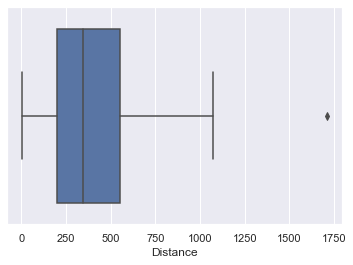

In [257]:
sns.boxplot(x=df_fsq['Distance'])

<AxesSubplot:xlabel='Rating'>

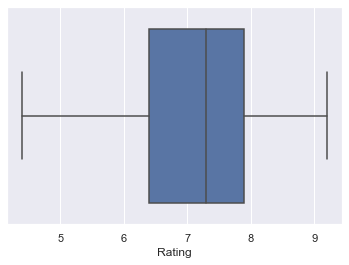

In [258]:
sns.boxplot(x=df_fsq['Rating'])

<AxesSubplot:xlabel='Popularity'>

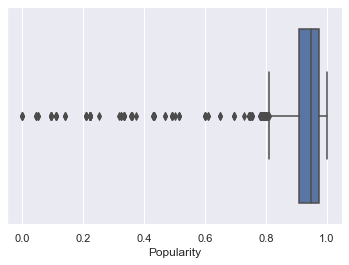

In [259]:
sns.boxplot(x=df_fsq['Popularity'])

<AxesSubplot:xlabel='Price'>

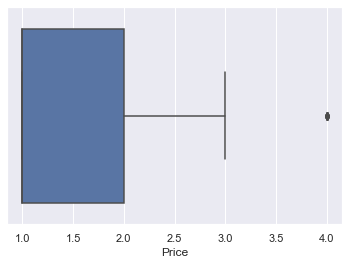

In [260]:
sns.boxplot(x=df_fsq['Price'])

<AxesSubplot:xlabel='Total Photos'>

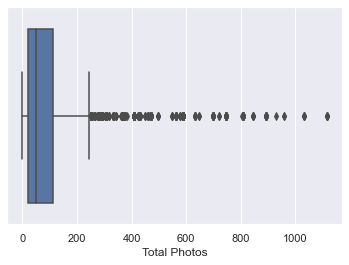

In [261]:
sns.boxplot(x=df_fsq['Total Photos'])

<AxesSubplot:xlabel='Total Ratings'>

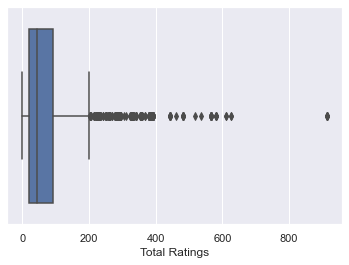

In [262]:
sns.boxplot(x=df_fsq['Total Ratings'])

<AxesSubplot:xlabel='Total Tips'>

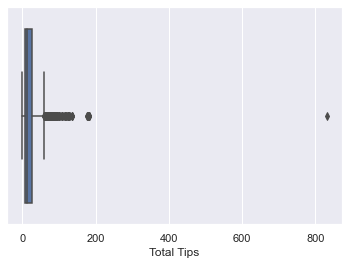

In [263]:
sns.boxplot(x=df_fsq['Total Tips'])

In [264]:
# FSQ - Drop Outliers using  IQR score technique

In [265]:
Q1 = df_fsq.quantile(0.25)
Q3 = df_fsq.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Latitude           0.017439
Longitude          0.033427
Distance         351.000000
Rating             1.500000
Popularity         0.065486
Price              1.000000
Total Photos      91.000000
Total Ratings     72.000000
Total Tips        21.000000
dtype: float64


In [266]:
df_fsq = df_fsq[~((df_fsq < (Q1 - 1.5 * IQR)) |(df_fsq > (Q3 + 1.5 * IQR))).any(axis=1)]
df_fsq.shape

# Note: Not all outliers are likely removed

/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_53398/2281037986.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_fsq = df_fsq[~((df_fsq < (Q1 - 1.5 * IQR)) |(df_fsq > (Q3 + 1.5 * IQR))).any(axis=1)]


(3579, 15)

Original shape of FSQ df: (6353, 15)

As seen above there were around 2774 rows were outliers. 

## Yelp

In [268]:
df_yelp = pd.read_csv("../data/yelp_restaurant_bar_cafe_data.csv", index_col=0)
display(df_yelp.head(5))

Station ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                  Yelp ID                            Venue Name Price  \
0  PrKpa6Ejv1v1WvIIywYMvg                   Aperture Coffee Bar    $$   
1  NensKn1MSVU_rm-1Y6WlFA                         Marulilu Cafe    $$   
2  X-73k3cwBjjc170MOdPa7A                        Elysian Coffee    $$   
3  dh-h2jbsa2ElN5Db0vfotQ  On the Grind - Pedalling Epic Coffee     $   
4  UkSNdIF54dvas25eh_CmFw                      Caffe Cittadella    $$   

   Review Count  Rating   Latitude   Longitude    Distance  \
0           122     4.0  49.263204 -123.110470  295.924920   
1           281     4.0  49.263380 -123.114150  102.329817   
2           207     3.5  49.262940 -123.117280  221.080646   
3             4     5.0  49.261226 -123.113927  144.308422   
4           152     4.0  49.264809 -123.117267  331.734686   

                                          Address Category name  
0   243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3                           Vancouver, BC, Canada  Coffee & Tea  
4  2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea

In [269]:
df_yelp.shape

(13615, 12)

In [270]:
# Yelp - Find duplicate values

duplicate_rows_df_yelp = df_yelp[df_yelp.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_yelp.shape)

number of duplicate rows:  (1013, 12)


In [271]:
# Yelp - Count number of rows

df_yelp.count()

Station ID       13615
Station Name     13615
Yelp ID          13615
Venue Name       13615
Price            10045
Review Count     13615
Rating           13615
Latitude         13615
Longitude        13615
Distance         13615
Address          13615
Category name    13615
dtype: int64

##### Above, there are 13615 rows and we are removing 1013 rows of duplicate data.



In [272]:
# Yelp - Remove duplicates

df_yelp = df_yelp.drop_duplicates()
df_yelp.head(5)

Station ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                  Yelp ID                            Venue Name Price  \
0  PrKpa6Ejv1v1WvIIywYMvg                   Aperture Coffee Bar    $$   
1  NensKn1MSVU_rm-1Y6WlFA                         Marulilu Cafe    $$   
2  X-73k3cwBjjc170MOdPa7A                        Elysian Coffee    $$   
3  dh-h2jbsa2ElN5Db0vfotQ  On the Grind - Pedalling Epic Coffee     $   
4  UkSNdIF54dvas25eh_CmFw                      Caffe Cittadella    $$   

   Review Count  Rating   Latitude   Longitude    Distance  \
0           122     4.0  49.263204 -123.110470  295.924920   
1           281     4.0  49.263380 -123.114150  102.329817   
2           207     3.5  49.262940 -123.117280  221.080646   
3             4     5.0  49.261226 -123.113927  144.308422   
4           152     4.0  49.264809 -123.117267  331.734686   

                                          Address Category name  
0   243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3                           Vancouver, BC, Canada  Coffee & Tea  
4  2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea

In [273]:
df_yelp.count()

Station ID       12602
Station Name     12602
Yelp ID          12602
Venue Name       12602
Price             9287
Review Count     12602
Rating           12602
Latitude         12602
Longitude        12602
Distance         12602
Address          12602
Category name    12602
dtype: int64

In [274]:
# Yelp - Dropping the missing or null values

In [275]:
# Yelp - Find the sum of Nulls in df

print(df_yelp.isnull().sum())

Station ID          0
Station Name        0
Yelp ID             0
Venue Name          0
Price            3315
Review Count        0
Rating              0
Latitude            0
Longitude           0
Distance            0
Address             0
Category name       0
dtype: int64


In [276]:
# Yelp - # Dropping the missing values.

df_yelp = df_yelp.dropna()    
df_yelp.count()

# Now we have removed all the rows which contain the Null/NaN values (Price).

Station ID       9287
Station Name     9287
Yelp ID          9287
Venue Name       9287
Price            9287
Review Count     9287
Rating           9287
Latitude         9287
Longitude        9287
Distance         9287
Address          9287
Category name    9287
dtype: int64

In [277]:
# Yelp - Check if nulls/NaNs were removed after dropping the values

print(df_yelp.isnull().sum())   

Station ID       0
Station Name     0
Yelp ID          0
Venue Name       0
Price            0
Review Count     0
Rating           0
Latitude         0
Longitude        0
Distance         0
Address          0
Category name    0
dtype: int64


In [278]:
# Yelp - Detecting Outliers

<AxesSubplot:xlabel='Review Count'>

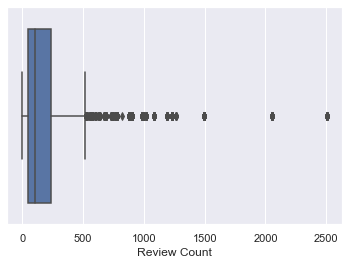

In [279]:
sns.boxplot(x=df_yelp['Review Count'])

<AxesSubplot:xlabel='Rating'>

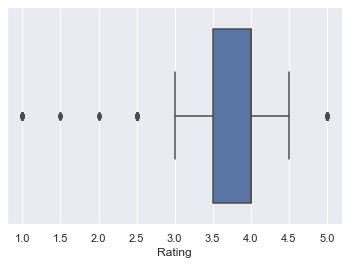

In [280]:
sns.boxplot(x=df_yelp['Rating'])

<AxesSubplot:xlabel='Distance'>

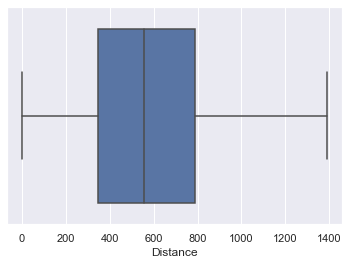

In [281]:
sns.boxplot(x=df_yelp['Distance'])

In [282]:
Q1 = df_yelp.quantile(0.25)
Q3 = df_yelp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Review Count    188.000000
Rating            0.500000
Latitude          0.017174
Longitude         0.033302
Distance        438.488795
dtype: float64


In [283]:
df_yelp = df_yelp[~((df_yelp < (Q1 - 1.5 * IQR)) |(df_yelp > (Q3 + 1.5 * IQR))).any(axis=1)]
df_yelp.shape

/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_53398/1283869621.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_yelp = df_yelp[~((df_yelp < (Q1 - 1.5 * IQR)) |(df_yelp > (Q3 + 1.5 * IQR))).any(axis=1)]


(8057, 12)

Yelp - original rows in df: 13615 

Above, there were around 5558 rows were outliers. 

## Vancouver Citybike Stations

In [348]:
df_vancouver_bikes = pd.read_csv("../data/vancouver_citybike_data.csv", index_col=0)
df_vancouver_bikes = df_vancouver_bikes.rename(columns={
    "id" : "Station_ID",
    "latitude" : "station_latitude",
    "longitude" : "station_longitude",
    "name" : "station_name"
    
})

df_vancouver_bikes = df_vancouver_bikes.drop(["timestamp", "extra.bank_card", "extra.uid"], axis=1)
display(df_vancouver_bikes.head(5))

empty_slots  free_bikes                        Station_ID  \
0           19          16  7a19c49f486d7c0c02b3685d7b240448   
1            1          15  32603a87cfca71d0f7dfa3513bad69d5   
2            3          23  6d42fa40360f9a6b2bf641c7b8bb2862   
3            8           8  66f873d641d448bd1572ab086665a458   
4           11           5  485d4d24c803cfde829ab89699fed833   

   station_latitude  station_longitude                      station_name  \
0         49.262487        -123.114397                0001 10th & Cambie   
1         49.274566        -123.121817  0004 Yaletown-Roundhouse Station   
2         49.279764        -123.110154            0005 Dunsmuir & Beatty   
3         49.260599        -123.113504     0007 12th & Yukon (City Hall)   
4         49.264215        -123.117772                    0008 8th & Ash   

   extra.slots extra.status  
0           35       online  
1           16       online  
2           26       online  
3           16       online  
4           16       online

In [349]:
df_vancouver_bikes.shape

(241, 8)

In [350]:
# check for duplicates 

duplicate_rows_df_vancouver_bikes = df_vancouver_bikes[df_vancouver_bikes.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_vancouver_bikes.shape)

# result: there are no duplicate rows 

number of duplicate rows:  (0, 8)


In [351]:
# # Rename column name

# df_vancouver_bikes = pd.read_csv("../data/vancouver_citybike_data.csv", index_col=0)
# df_vancouver_bikes = df_vancouver_bikes.rename(columns={"id" : "Station_ID"})
# display(df_vancouver_bikes.head(5))

# Merge DataFrames

In [352]:
df_yelp = df_yelp.rename(columns={"Station ID" : "Station_ID"})

# df_fsq_yelp = pd.merge(df_fsq, df_yelp, right_on="Station_ID", left_on="Station_ID", how="left")
merge_on_list = ["Station_ID", "Station Name", "Venue Name"]

df_bikes_yelp = pd.merge(df_vancouver_bikes, df_yelp, on="Station_ID")
df_bikes_fsq = pd.merge(df_vancouver_bikes, df_fsq, on="Station_ID")

display(df_bikes_yelp.head(5))  # Yelp and Bike Stations
display(df_bikes_fsq.head(5))   # FSQ and Bike Stations

empty_slots  free_bikes                        Station_ID  \
0           19          16  7a19c49f486d7c0c02b3685d7b240448   
1           19          16  7a19c49f486d7c0c02b3685d7b240448   
2           19          16  7a19c49f486d7c0c02b3685d7b240448   
3           19          16  7a19c49f486d7c0c02b3685d7b240448   
4           19          16  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  extra.slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   
1         49.262487        -123.114397  0001 10th & Cambie           35   
2         49.262487        -123.114397  0001 10th & Cambie           35   
3         49.262487        -123.114397  0001 10th & Cambie           35   
4         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                 Yelp ID  \
0       online  0001 10th & Cambie  PrKpa6Ejv1v1WvIIywYMvg   
1       online  0001 10th & Cambie  NensKn1MSVU_rm-1Y6WlFA   
2       online  0001 10th & Cambie  X-73k3cwBjjc170MOdPa7A   
3       online  0001 10th & Cambie  UkSNdIF54dvas25eh_CmFw   
4       online  0001 10th & Cambie  NnaE4IKlc6XdYOUu4IOV5w   

             Venue Name Price  Review Count  Rating   Latitude   Longitude  \
0   Aperture Coffee Bar    $$           122     4.0  49.263204 -123.110470   
1         Marulilu Cafe    $$           281     4.0  49.263380 -123.114150   
2        Elysian Coffee    $$           207     3.5  49.262940 -123.117280   
3      Caffe Cittadella    $$           152     4.0  49.264809 -123.117267   
4  49th Parallel Coffee     $           495     4.0  49.259133 -123.100885   

      Distance                                          Address Category name  
0   295.924920    243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   102.329817    451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   221.080646    590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3   331.734686   2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea  
4  1049.076361  2902 Main Street, Vancouver, BC V5T 0C1, Canada         Cafes

empty_slots  free_bikes                        Station_ID  \
0           19          16  7a19c49f486d7c0c02b3685d7b240448   
1           19          16  7a19c49f486d7c0c02b3685d7b240448   
2           19          16  7a19c49f486d7c0c02b3685d7b240448   
3           19          16  7a19c49f486d7c0c02b3685d7b240448   
4           19          16  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  extra.slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   
1         49.262487        -123.114397  0001 10th & Cambie           35   
2         49.262487        -123.114397  0001 10th & Cambie           35   
3         49.262487        -123.114397  0001 10th & Cambie           35   
4         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                    FSQ_ID  ...   Longitude  \
0       online  0001 10th & Cambie  4b1db335f964a520211424e3  ... -123.113942   
1       online  0001 10th & Cambie  4aa8320cf964a520f94f20e3  ... -123.115731   
2       online  0001 10th & Cambie  5177156c498ea4fd6b901dda  ... -123.110286   
3       online  0001 10th & Cambie  4c75baefdb52b1f7c5b979dc  ... -123.117227   
4       online  0001 10th & Cambie  4aee5795f964a520a0d321e3  ... -123.119627   

   Distance                                            Address  Category name  \
0        96  451W Broadway W (at Cambie St), Vancouver BC V...           Café   
1       144  521W Broadway W (at Cambie St), Vancouver BC V...           Café   
2       299  243 West Broadway (at Alberta St), Vancouver B...           Café   
3       336   2310 Ash St (at W 7th Ave), Vancouver BC V5Z 3C2    Coffee Shop   
4       400  695 Broadway W (at Heather St.), Vancouver BC ...           Café   

  Rating Popularity  Price  Total Photos  Total Ratings  Total Tips  
0    8.2   0.953849    2.0         128.0          111.0        32.0  
1    5.4   0.977400    1.0          33.0           31.0        15.0  
2    8.4   0.923845    1.0          68.0           96.0        30.0  
3    8.6   0.961136    2.0         135.0           79.0        27.0  
4    5.6   0.943686    1.0          29.0           24.0         6.0  

[5 rows x 22 columns]

### Provide a visualization that you used as part of your EDA process. 
Explain the initial pattern or relationship you discoved through this visualization. 

# Yelp - Data Visualization

In [353]:
df_bikes_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 0 to 8056
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empty_slots        8057 non-null   int64  
 1   free_bikes         8057 non-null   int64  
 2   Station_ID         8057 non-null   object 
 3   station_latitude   8057 non-null   float64
 4   station_longitude  8057 non-null   float64
 5   station_name       8057 non-null   object 
 6   extra.slots        8057 non-null   int64  
 7   extra.status       8057 non-null   object 
 8   Station Name       8057 non-null   object 
 9   Yelp ID            8057 non-null   object 
 10  Venue Name         8057 non-null   object 
 11  Price              8057 non-null   object 
 12  Review Count       8057 non-null   int64  
 13  Rating             8057 non-null   float64
 14  Latitude           8057 non-null   float64
 15  Longitude          8057 non-null   float64
 16  Distance           8057 

In [354]:
df_bikes_yelp.describe()

empty_slots   free_bikes  station_latitude  station_longitude  \
count  8057.000000  8057.000000       8057.000000        8057.000000   
mean      9.970585     8.661909         49.271995        -123.114742   
std       5.802548     5.682001          0.010805           0.026979   
min       0.000000     0.000000         49.238105        -123.191458   
25%       5.000000     4.000000         49.263523        -123.132778   
50%      10.000000     8.000000         49.271721        -123.115392   
75%      14.000000    13.000000         49.280332        -123.097052   
max      37.000000    23.000000         49.302577        -123.056909   

       extra.slots  Review Count       Rating     Latitude    Longitude  \
count  8057.000000   8057.000000  8057.000000  8057.000000  8057.000000   
mean     18.660916    137.710935     3.936949    49.272315  -123.114416   
std       5.215058    123.135509     0.422121     0.010514     0.026522   
min      12.000000      1.000000     3.000000    49.240341  -123.183875   
25%      14.000000     46.000000     3.500000    49.264063  -123.133070   
50%      18.000000     96.000000     4.000000    49.271895  -123.115380   
75%      20.000000    195.000000     4.000000    49.281060  -123.100446   
max      40.000000    518.000000     4.500000    49.301253  -123.051462   

          Distance  
count  8057.000000  
mean    569.891836  
std     287.788739  
min       1.973312  
25%     343.387178  
50%     554.398936  
75%     781.434814  
max    1386.683256

In [355]:
df_bikes_yelp.corr()

empty_slots  free_bikes  station_latitude  \
empty_slots           1.000000   -0.586408         -0.103791   
free_bikes           -0.586408    1.000000          0.269920   
station_latitude     -0.103791    0.269920          1.000000   
station_longitude    -0.084854   -0.102234         -0.075567   
extra.slots           0.475063    0.433573          0.176417   
Review Count         -0.005064    0.034335          0.072878   
Rating               -0.015682    0.046514          0.130575   
Latitude             -0.108954    0.249482          0.926608   
Longitude            -0.085124   -0.084808         -0.076548   
Distance             -0.009319   -0.005077         -0.093044   

                   station_longitude  extra.slots  Review Count    Rating  \
empty_slots                -0.084854     0.475063     -0.005064 -0.015682   
free_bikes                 -0.102234     0.433573      0.034335  0.046514   
station_latitude           -0.075567     0.176417      0.072878  0.130575   
station_longitude           1.000000    -0.204871     -0.040827  0.040720   
extra.slots                -0.204871     1.000000      0.031594  0.032860   
Review Count               -0.040827     0.031594      1.000000  0.066472   
Rating                      0.040720     0.032860      0.066472  1.000000   
Latitude                   -0.070105     0.148172      0.075682  0.143566   
Longitude                   0.973763    -0.186085     -0.040592  0.042550   
Distance                   -0.032572    -0.016600     -0.024626  0.050208   

                   Latitude  Longitude  Distance  
empty_slots       -0.108954  -0.085124 -0.009319  
free_bikes         0.249482  -0.084808 -0.005077  
station_latitude   0.926608  -0.076548 -0.093044  
station_longitude -0.070105   0.973763 -0.032572  
extra.slots        0.148172  -0.186085 -0.016600  
Review Count       0.075682  -0.040592 -0.024626  
Rating             0.143566   0.042550  0.050208  
Latitude           1.000000  -0.071907 -0.067396  
Longitude         -0.071907   1.000000 -0.019784  
Distance          -0.067396  -0.019784  1.000000

<AxesSubplot:>

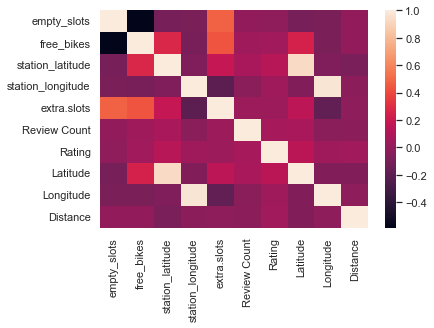

In [356]:
sns.heatmap(df_bikes_yelp.corr())

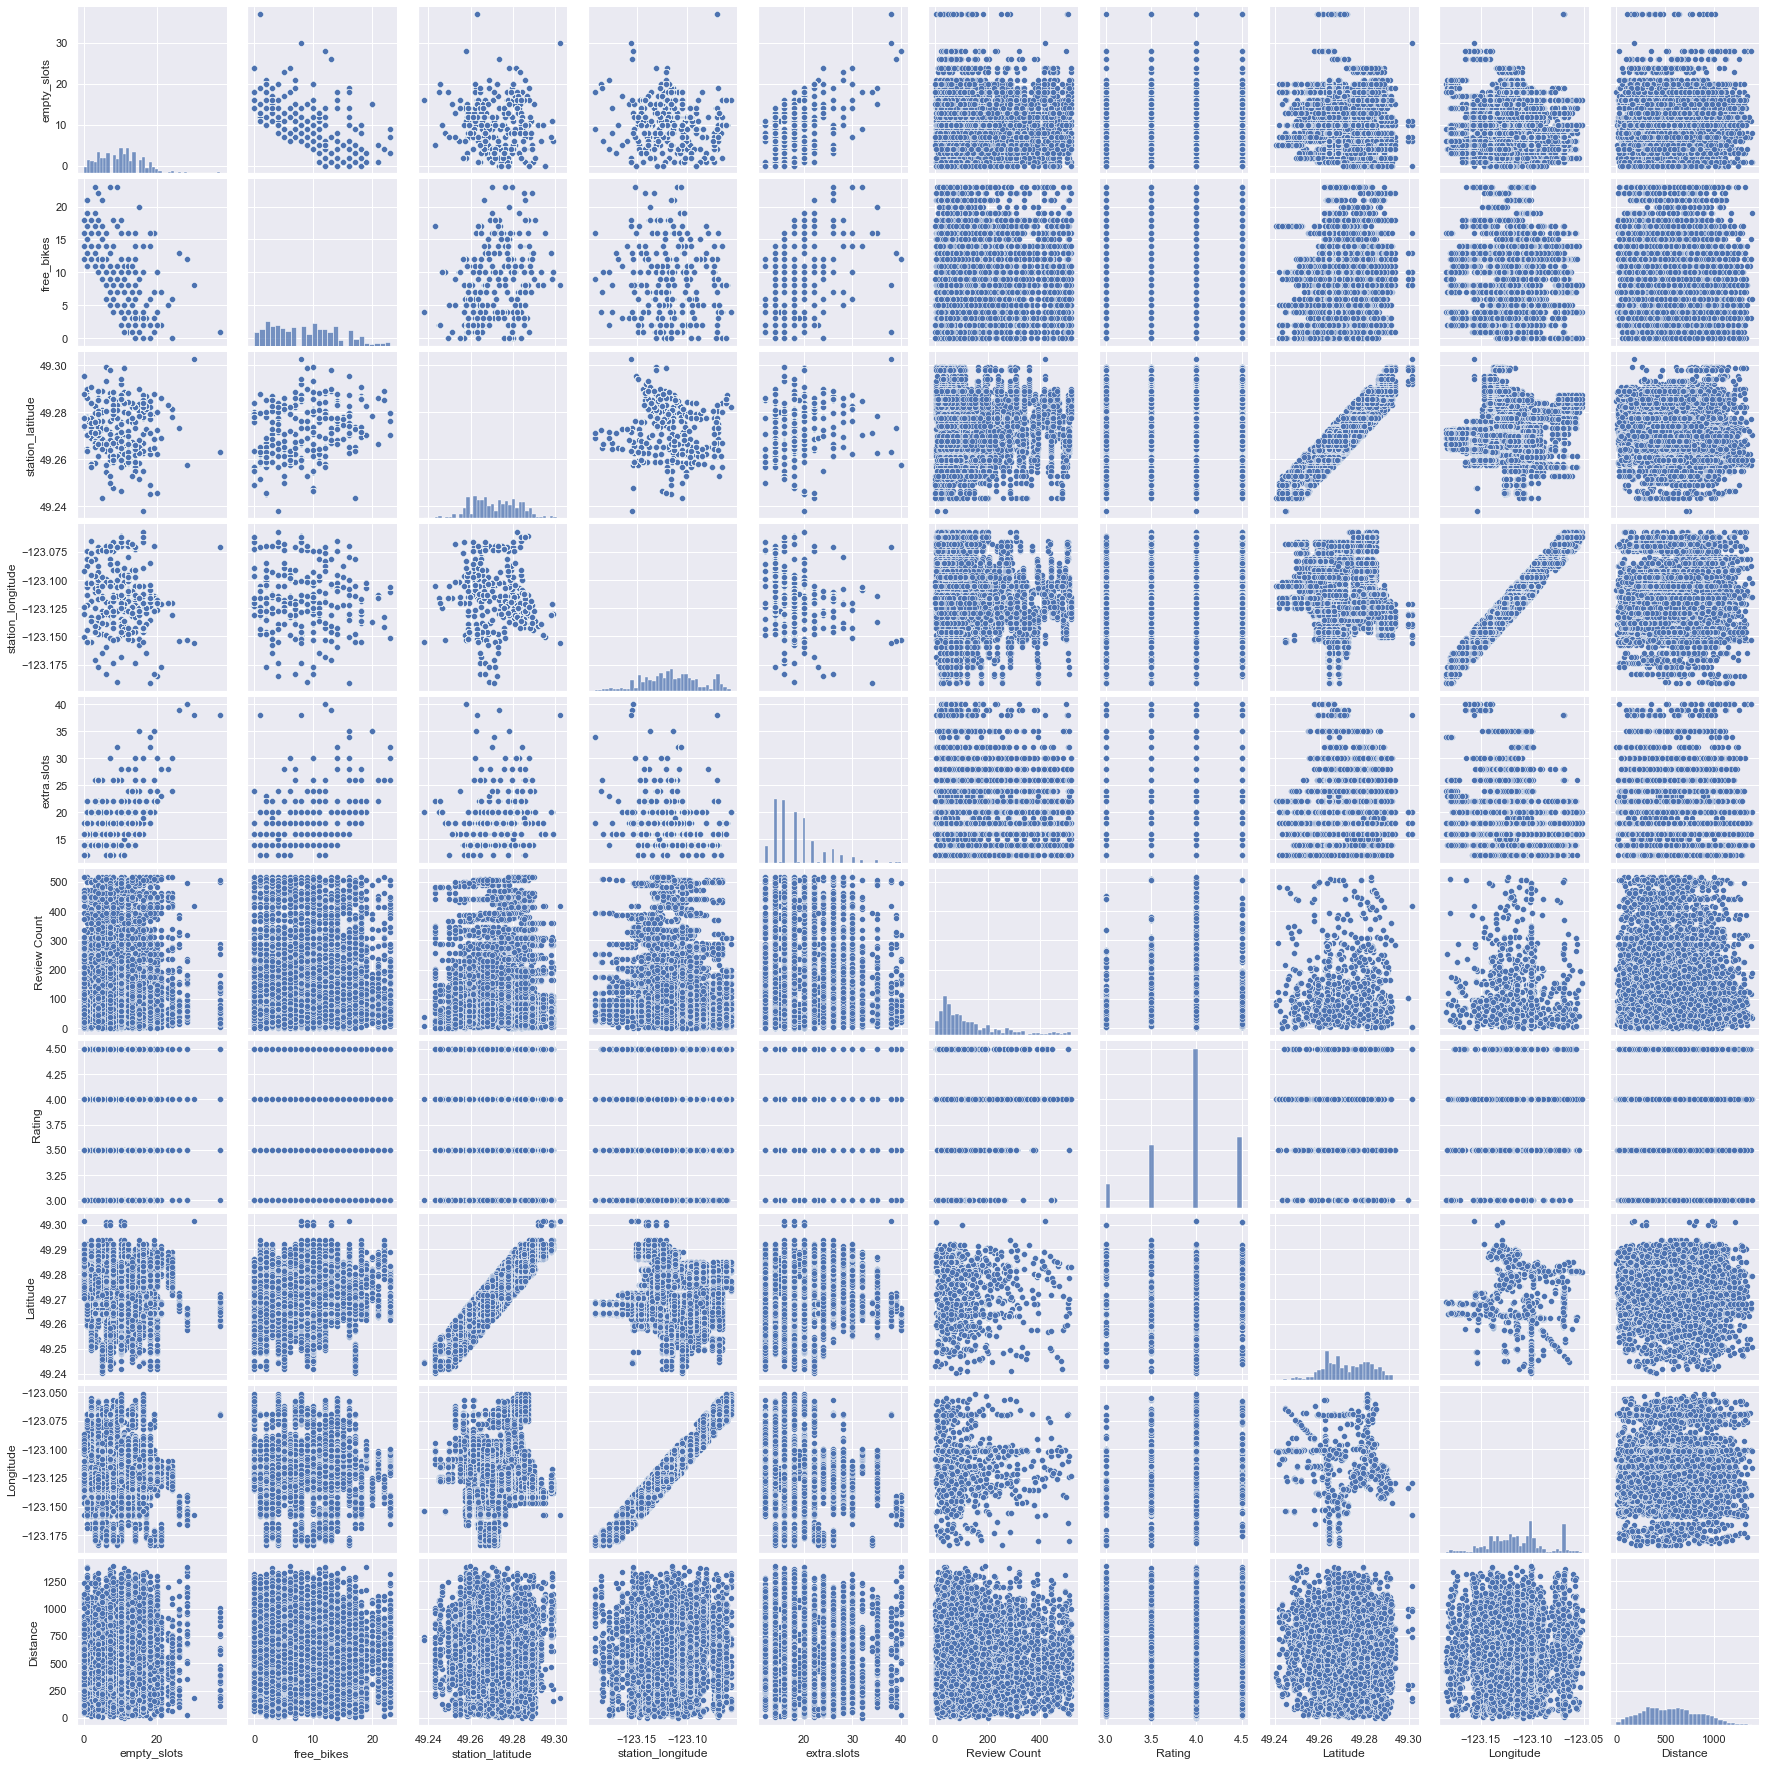

In [359]:
sns.pairplot(df_bikes_yelp)

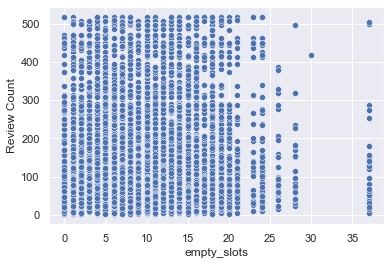

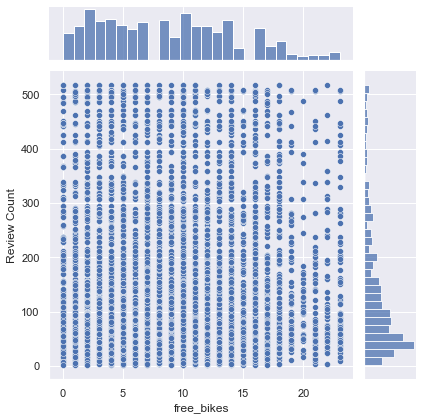

In [365]:
sns.scatterplot(data=df_bikes_yelp, x="empty_slots", y="Review Count")

sns.jointplot(data=df_bikes_yelp, x="free_bikes", y="Review Count")


# Foursquare - Data Visualization

In [360]:
df_bikes_fsq.corr()

empty_slots  free_bikes  station_latitude  \
empty_slots           1.000000   -0.588954         -0.059499   
free_bikes           -0.588954    1.000000          0.269355   
station_latitude     -0.059499    0.269355          1.000000   
station_longitude    -0.063349   -0.102600         -0.087642   
extra.slots           0.476388    0.429468          0.225303   
Latitude             -0.054243    0.261301          0.959539   
Longitude            -0.061978   -0.092578         -0.080942   
Distance             -0.083425   -0.017438         -0.221159   
Rating               -0.005762    0.005470          0.012960   
Popularity           -0.019149    0.053310          0.062812   
Price                 0.027169   -0.030149          0.008144   
Total Photos         -0.001562    0.041053          0.122597   
Total Ratings         0.013651    0.042260          0.126843   
Total Tips            0.022897    0.034110          0.108757   

                   station_longitude  extra.slots  Latitude  Longitude  \
empty_slots                -0.063349     0.476388 -0.054243  -0.061978   
free_bikes                 -0.102600     0.429468  0.261301  -0.092578   
station_latitude           -0.087642     0.225303  0.959539  -0.080942   
station_longitude           1.000000    -0.181792 -0.082385   0.986615   
extra.slots                -0.181792     1.000000  0.222144  -0.169513   
Latitude                   -0.082385     0.222144  1.000000  -0.075799   
Longitude                   0.986615    -0.169513 -0.075799   1.000000   
Distance                   -0.000060    -0.112903 -0.237313   0.010677   
Rating                      0.025994     0.000214  0.002878   0.031533   
Popularity                  0.047406     0.037015  0.072951   0.047409   
Price                      -0.037040    -0.002432  0.006074  -0.036268   
Total Photos                0.027057     0.043899  0.136136   0.025179   
Total Ratings               0.010326     0.061829  0.142515   0.010315   
Total Tips                  0.012525     0.063359  0.122427   0.014736   

                   Distance    Rating  Popularity     Price  Total Photos  \
empty_slots       -0.083425 -0.005762   -0.019149  0.027169     -0.001562   
free_bikes        -0.017438  0.005470    0.053310 -0.030149      0.041053   
station_latitude  -0.221159  0.012960    0.062812  0.008144      0.122597   
station_longitude -0.000060  0.025994    0.047406 -0.037040      0.027057   
extra.slots       -0.112903  0.000214    0.037015 -0.002432      0.043899   
Latitude          -0.237313  0.002878    0.072951  0.006074      0.136136   
Longitude          0.010677  0.031533    0.047409 -0.036268      0.025179   
Distance           1.000000 -0.001216   -0.024030 -0.022569      0.019541   
Rating            -0.001216  1.000000    0.196627  0.162039      0.314976   
Popularity        -0.024030  0.196627    1.000000 -0.017697      0.284974   
Price             -0.022569  0.162039   -0.017697  1.000000      0.250334   
Total Photos       0.019541  0.314976    0.284974  0.250334      1.000000   
Total Ratings     -0.030068  0.333811    0.298913  0.246626      0.880749   
Total Tips        -0.030106  0.256259    0.184156  0.216850      0.797626   

                   Total Ratings  Total Tips  
empty_slots             0.013651    0.022897  
free_bikes              0.042260    0.034110  
station_latitude        0.126843    0.108757  
station_longitude       0.010326    0.012525  
extra.slots             0.061829    0.063359  
Latitude                0.142515    0.122427  
Longitude               0.010315    0.014736  
Distance               -0.030068   -0.030106  
Rating                  0.333811    0.256259  
Popularity              0.298913    0.184156  
Price                   0.246626    0.216850  
Total Photos            0.880749    0.797626  
Total Ratings           1.000000    0.898506  
Total Tips              0.898506    1.000000

<AxesSubplot:>

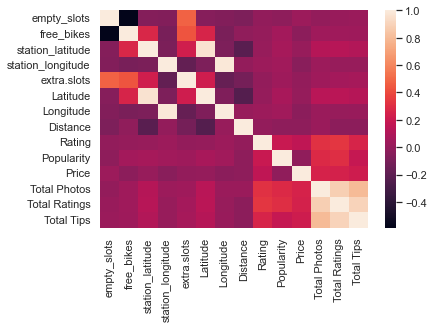

In [361]:
sns.heatmap(df_bikes_fsq.corr())

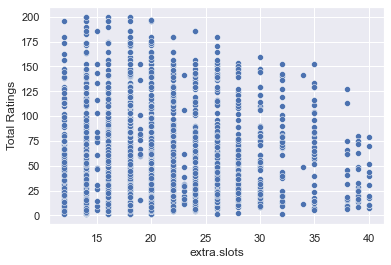

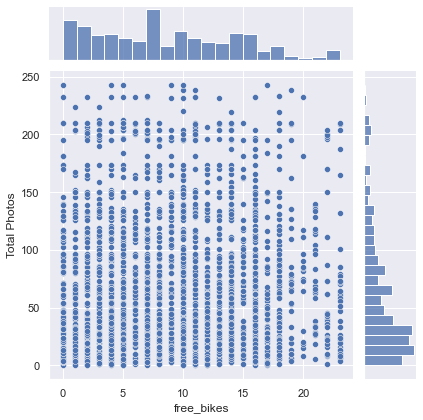

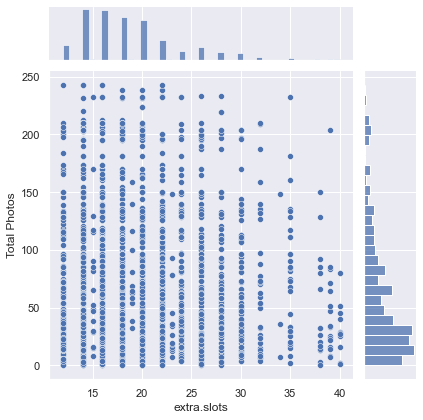

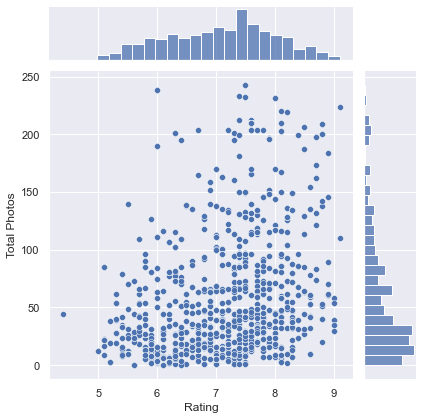

In [364]:
# Foursquare

sns.scatterplot(data=df_bikes_fsq, x="extra.slots", y="Total Ratings")

sns.jointplot(data=df_bikes_fsq, x="free_bikes", y="Total Photos")

sns.jointplot(data=df_bikes_fsq, x="extra.slots", y="Total Photos")

sns.jointplot(data=df_bikes_fsq, x="Rating", y="Total Photos")

As seen above, number of bikes does not seem to correlate with the number of photos taken at the POI location.



AttributeError: 'PairGrid' object has no attribute 'show'

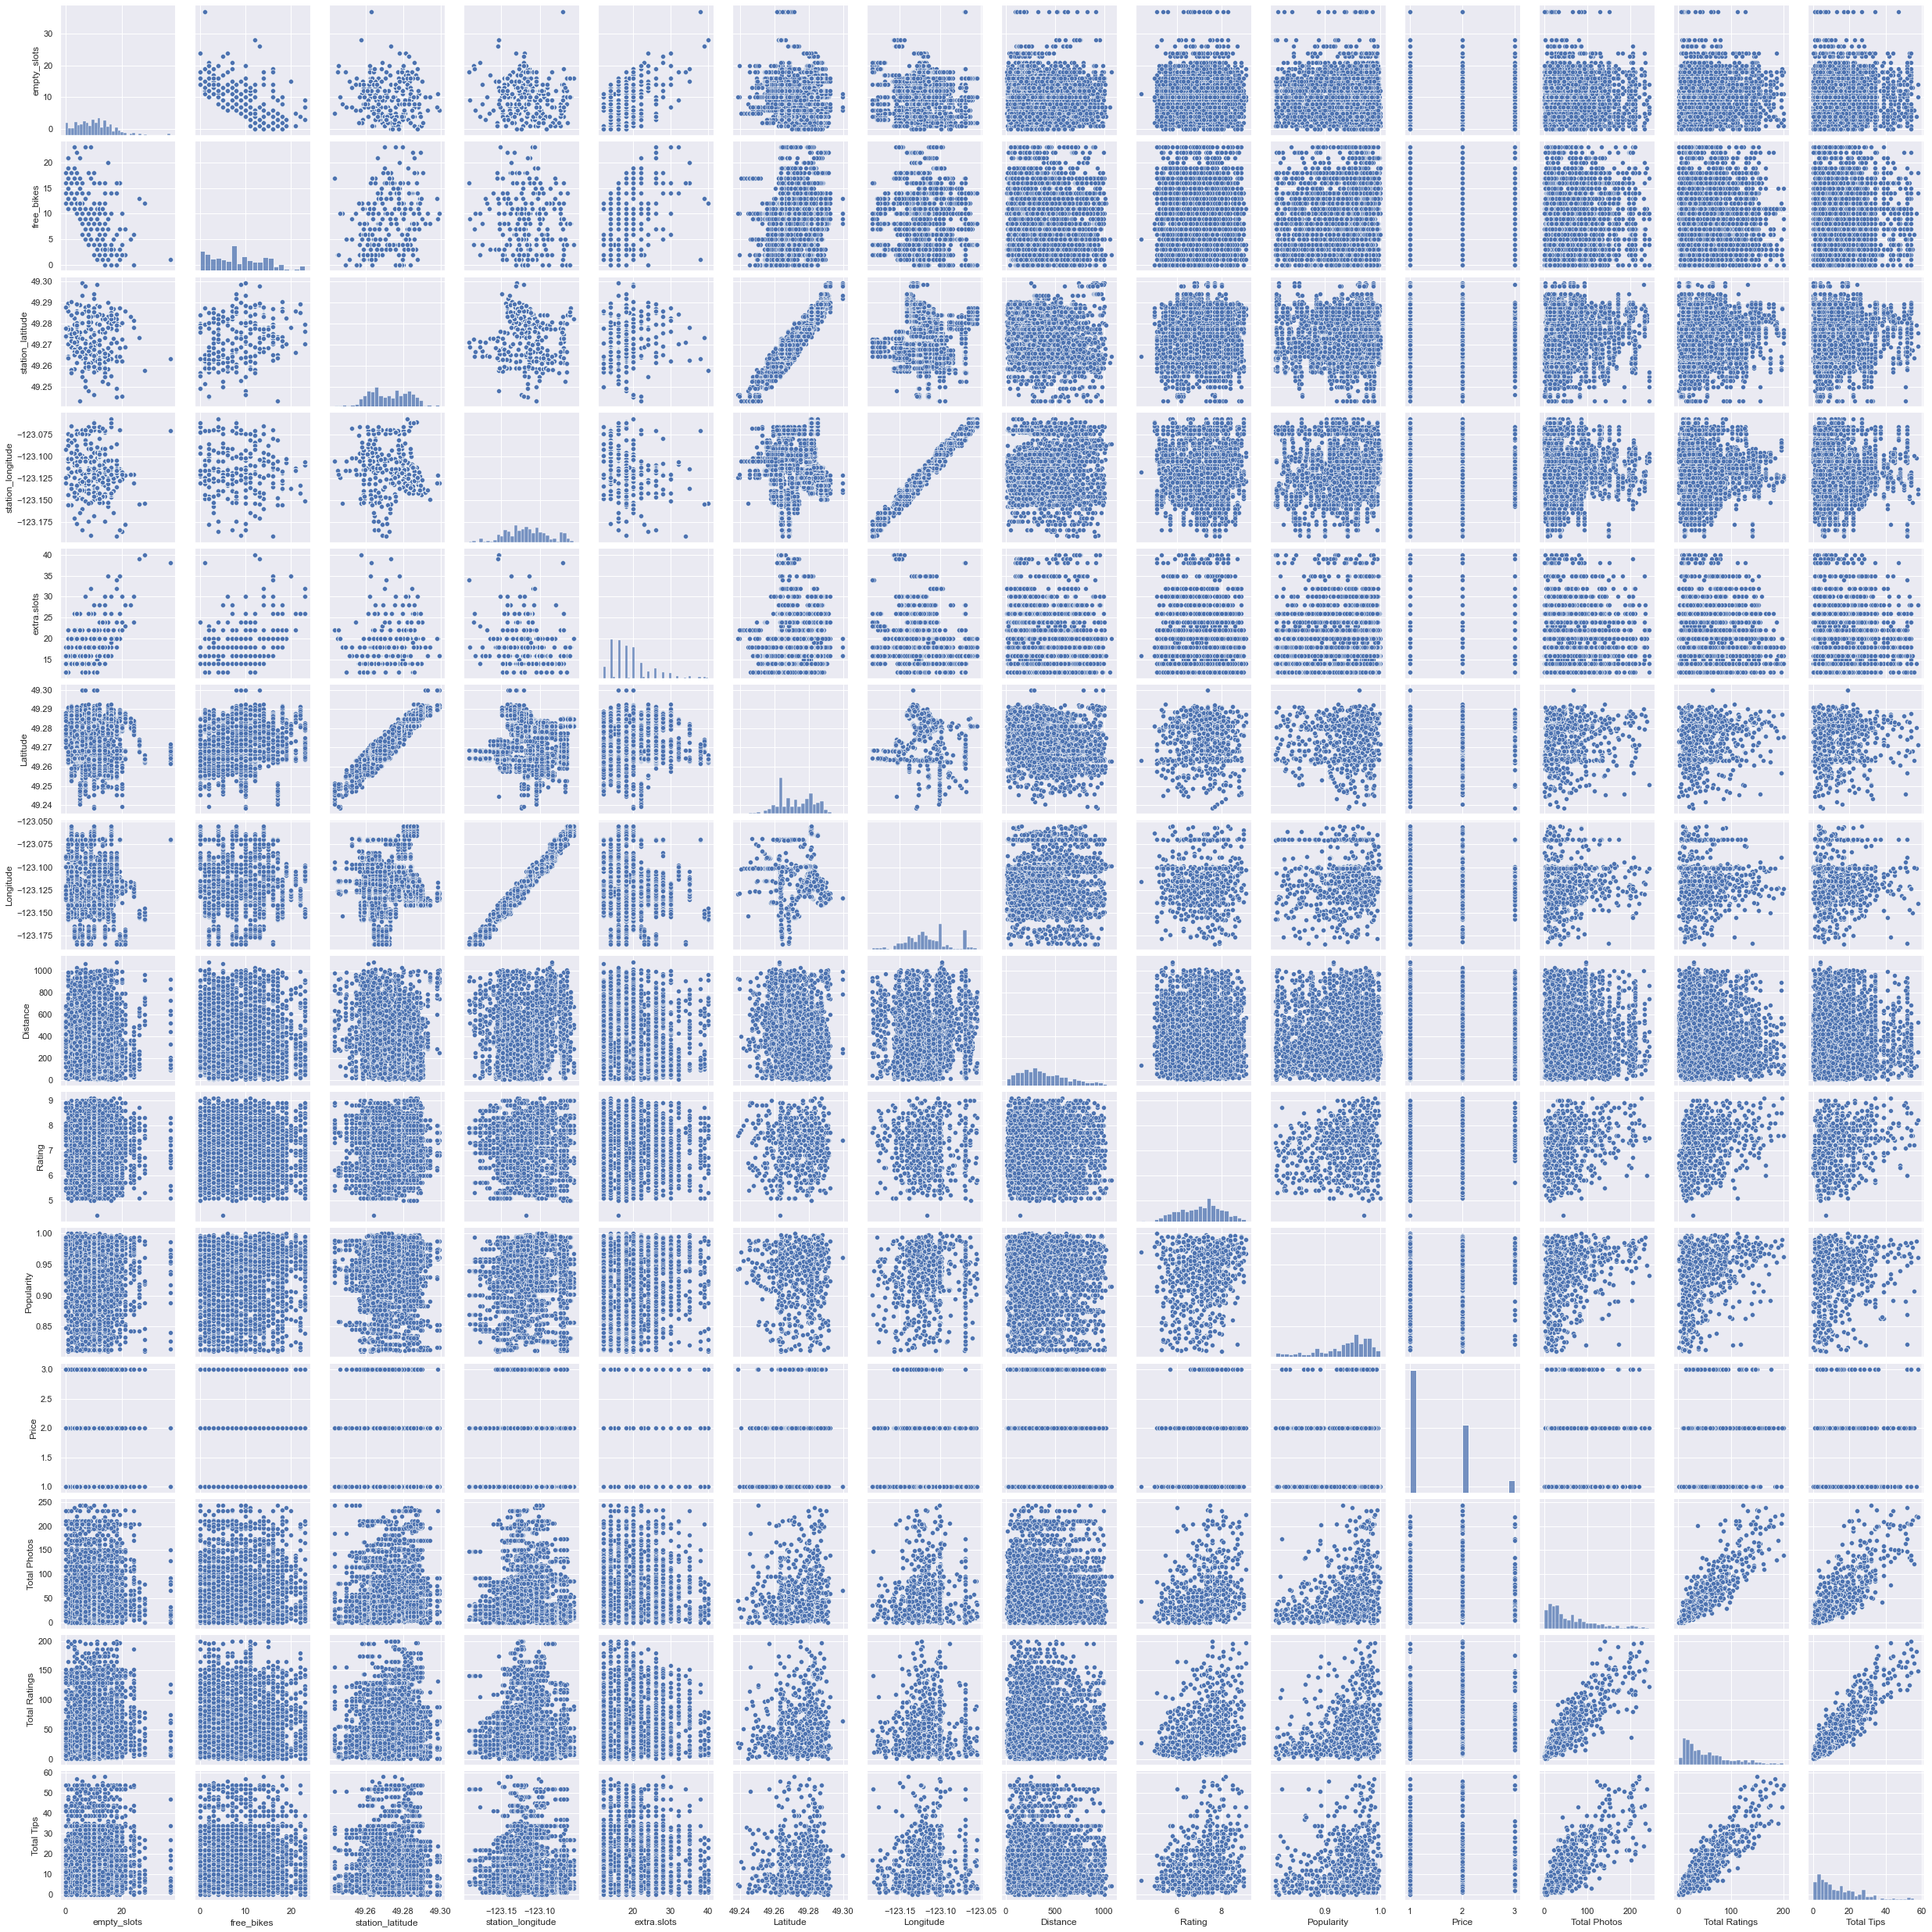

In [366]:
plt = sns.pairplot(df_bikes_fsq)
plt.show()

In [ ]:
df_bikes_fsq.to_csv("../data/bikes_fsq_data.csv")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [307]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
        cursor.close()
        connection.close()
    except Error as e:
        print(f"The error '{e}' occurred")

In [308]:
connection = create_connection("project_2.sqlite")

Connection to SQLite DB successful


In [309]:
create_bike_data_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
    Station_ID VARCHAR NOT NULL,
    name TEXT NOT NULL,
    total_slots INTEGER,
    empty_slots INTEGER,
    free_bikes INTEGER,
    longitude FLOAT,
    latitude FLOAT,
    status TEXT
);
"""

In [302]:
execute_query(connection, create_bike_data_table)  

In [314]:
# Rename columns

df_bikes = df_vancouver_bikes.rename(columns={
    'station_latitude' : 'latitude',
    'station_longitude': 'longitude',
    'station_name' : 'name',
    'extra.slots' : 'total_slots',
    'extra.status' : 'status'
})
display(df_bikes.head(5))

empty_slots  free_bikes                        Station_ID   latitude  \
0           19          16  7a19c49f486d7c0c02b3685d7b240448  49.262487   
1            1          15  32603a87cfca71d0f7dfa3513bad69d5  49.274566   
2            3          23  6d42fa40360f9a6b2bf641c7b8bb2862  49.279764   
3            8           8  66f873d641d448bd1572ab086665a458  49.260599   
4           11           5  485d4d24c803cfde829ab89699fed833  49.264215   

    longitude                              name                    timestamp  \
0 -123.114397                0001 10th & Cambie  2022-11-05T16:52:07.465000Z   
1 -123.121817  0004 Yaletown-Roundhouse Station  2022-11-05T16:52:07.468000Z   
2 -123.110154            0005 Dunsmuir & Beatty  2022-11-05T16:52:07.468000Z   
3 -123.113504     0007 12th & Yukon (City Hall)  2022-11-05T16:52:07.470000Z   
4 -123.117772                    0008 8th & Ash  2022-11-05T16:52:07.471000Z   

   extra.bank_card  total_slots  status  extra.uid  
0            False           35  online          1  
1            False           16  online          4  
2            False           26  online          5  
3            False           16  online          7  
4            False           16  online          8

In [304]:
# df_bikes.to_sql(name="bike_stations", con=connection, if_exists='append', index=False)

In [316]:
# select_bike_stations = "SELECT * from bike_stations"
# bike_stations = execute_query(connection, select_bike_stations)

# for station in bike_stations:
#     print(station)

In [319]:
df_bikes.to_sql('bike_stations', con=connection, if_exists='replace', index=False)

DatabaseError: Execution failed on sql 'DROP TABLE "bike_stations"': database is locked

In [320]:
connection.execute("SELECT * from bike_stations").fetchall()

[(0,
  19,
  16,
  '7a19c49f486d7c0c02b3685d7b240448',
  49.262487,
  -123.114397,
  '0001 10th & Cambie',
  35,
  'online'),
 (1,
  1,
  15,
  '32603a87cfca71d0f7dfa3513bad69d5',
  49.274566,
  -123.121817,
  '0004 Yaletown-Roundhouse Station',
  16,
  'online'),
 (2,
  3,
  23,
  '6d42fa40360f9a6b2bf641c7b8bb2862',
  49.279764,
  -123.110154,
  '0005 Dunsmuir & Beatty',
  26,
  'online'),
 (3,
  8,
  8,
  '66f873d641d448bd1572ab086665a458',
  49.260599,
  -123.113504,
  '0007 12th & Yukon (City Hall)',
  16,
  'online'),
 (4,
  11,
  5,
  '485d4d24c803cfde829ab89699fed833',
  49.264215,
  -123.117772,
  '0008 8th & Ash',
  16,
  'online'),
 (5,
  11,
  3,
  'b07d513f87897cff7319a0e59d7e567c',
  49.270877,
  -123.115103,
  '0009 Spyglass & Seawall',
  14,
  'online'),
 (6,
  2,
  12,
  'd1c9556d92f329703229fb3e33899a3b',
  49.26893,
  -123.11813,
  '0010 Stamps Landing',
  14,
  'online'),
 (7,
  7,
  13,
  '95e624191c655f50e401d280cd39a9ad',
  49.271721,
  -123.104207,
  '0011 Ontari

### Look at the data before and after the join to validate your data.

## FSQ and Citybike Stations

In [ ]:
create_bike_fsq_data_table = """
CREATE TABLE IF NOT EXISTS bike_stations_fsq (
    Station_ID VARCHAR NOT NULL,
    name TEXT NOT NULL,
    total_slots INTEGER,
    empty_slots INTEGER,
    free_bikes INTEGER,
    longitude FLOAT,
    latitude FLOAT,
    status TEXT
);
# """

In [ ]:
# after creating SQL table header
execute_query(connection, create_bike_fsq_data_table)  

## Yelp and Citybike Stations